##Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#import sidetable as stb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd 

##Load data

In [ ]:
df = pd.read_csv('1659264665216-flight.csv')
df.sample(5)


MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
58984      32155   10/2/2011         10/2/2011   Male         4       jinhua   
4376       59776   7/11/2011         7/11/2011   Male         4     shenzhen   
18631      58266   9/22/2009         9/22/2009   Male         4    changchun   
55125      37936   2/26/2013         4/16/2013   Male         4        wuhan   
36978      55537  10/22/2010        12/17/2012   Male         4  qinhuangdao   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
58984      zhejiang           CN  52.0  3/31/2014  ...    1392.0        2360   
4376      guangdong           CN  30.0  3/31/2014  ...   20640.0       53411   
18631         jilin           CN  56.0  3/31/2014  ...    5320.0       18278   
55125         hubei           CN  33.0  3/31/2014  ...    1608.0        4374   
36978         hebei           CN  39.0  3/31/2014  ...    2341.0        5547   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
58984          3/5/2014           27      6.000000            6   
4376          3/21/2014           11     17.925000           70   
18631         3/30/2014            2     57.727273          166   
55125         7/26/2013          250     50.500000          100   
36978        10/23/2013          161    155.000000          308   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
58984               0      0.605000        1084                0  
4376                0      0.687385       30987                0  
18631               0      0.718894       10190                0  
55125               0      0.454005        1200                0  
36978               0      0.969434        5871                4  

[5 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
numeric = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
numeric

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

In [ ]:
categorical = df.loc[:, (df.dtypes != int) & (df.dtypes != float)].columns.tolist()
categorical

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

In [ ]:
df.sample(5)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
2212       50416   6/30/2012          8/1/2012    Male         5     haikou   
61141      12503  11/22/2008        11/22/2008  Female         4  guangzhou   
8360       12466   8/18/2008         9/19/2010    Male         4  guangzhou   
3303       62450   3/21/2006         3/21/2006    Male         5     dalian   
6751       48103   4/28/2008          6/4/2008    Male         5   shanghai   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
2212         hainan           CN  48.0  3/31/2014  ...   44499.0       73418   
61141     guangdong           CN  41.0  3/31/2014  ...     763.0        2865   
8360      guangdong           CN  38.0  3/31/2014  ...   18132.0       34051   
3303       liaoning           CN  43.0  3/31/2014  ...   22512.0       53076   
6751       shanghai           CN  42.0  3/31/2014  ...   20378.0       35187   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
2212          3/28/2014            4      9.918033           49   
61141         3/24/2014            8    196.000000          487   
8360          3/13/2014           19     19.250000          100   
3303          3/20/2014           12     14.062500           49   
6751          3/22/2014           10     18.548387           84   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
2212                0      0.686490       54750                4  
61141               0      0.365271       10658               19  
8360                0      0.728930       23352                0  
3303                0      0.790940       39055                2  
6751                0      0.809497       28898                3  

[5 rows x 23 columns]

In [ ]:
df[numeric].describe().apply(lambda x: x.apply('{0:.5f}'.format))

MEMBER_NO     FFP_TIER          AGE FLIGHT_COUNT        BP_SUM  \
count  62988.00000  62988.00000  62568.00000  62988.00000   62988.00000   
mean   31494.50000      4.10216     42.47635     11.83941   10925.08125   
std    18183.21371      0.37386      9.88591     14.04947   16339.48615   
min        1.00000      4.00000      6.00000      2.00000       0.00000   
25%    15747.75000      4.00000     35.00000      3.00000    2518.00000   
50%    31494.50000      4.00000     41.00000      7.00000    5700.00000   
75%    47241.25000      4.00000     48.00000     15.00000   12831.00000   
max    62988.00000      6.00000    110.00000    213.00000  505308.00000   

           SUM_YR_1      SUM_YR_2    SEG_KM_SUM  LAST_TO_END AVG_INTERVAL  \
count   62437.00000   62850.00000   62988.00000  62988.00000  62988.00000   
mean     5355.37606    5604.02601   17123.87869    176.12010     67.74979   
std      8109.45015    8703.36425   20960.84462    183.82222     77.51787   
min         0.00000       0.00000     368.00000      1.00000      0.00000   
25%      1003.00000     780.00000    4747.00000     29.00000     23.37037   
50%      2800.00000    2773.00000    9994.00000    108.00000     44.66667   
75%      6574.00000    6845.75000   21271.25000    268.00000     82.00000   
max    239560.00000  234188.00000  580717.00000    731.00000    728.00000   

      MAX_INTERVAL EXCHANGE_COUNT avg_discount    Points_Sum Point_NotFlight  
count  62988.00000    62988.00000  62988.00000   62988.00000     62988.00000  
mean     166.03390        0.31978      0.72156   12545.77710         2.72815  
std      123.39718        1.13600      0.18543   20507.81670         7.36416  
min        0.00000        0.00000      0.00000       0.00000         0.00000  
25%       79.00000        0.00000      0.61200    2775.00000         0.00000  
50%      143.00000        0.00000      0.71186    6328.50000         0.00000  
75%      228.00000        0.00000      0.80948   14302.50000         1.00000  
max      728.00000       46.00000      1.50000  985572.00000       140.00000

In [ ]:
df[categorical].describe()

FFP_DATE FIRST_FLIGHT_DATE GENDER  WORK_CITY WORK_PROVINCE  \
count       62988             62988  62985      60719         59740   
unique       3068              3406      2       3234          1165   
top     1/13/2011         2/16/2013   Male  guangzhou     guangdong   
freq          184                96  48134       9386         17509   

       WORK_COUNTRY  LOAD_TIME LAST_FLIGHT_DATE  
count         62962      62988            62988  
unique          118          1              731  
top              CN  3/31/2014        3/31/2014  
freq          57748      62988              959

##Data Pre-Processing

In [ ]:
df_clean = df.copy()

In [ ]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

feature  missing_value  percentage
0  WORK_PROVINCE           3248       5.157
1      WORK_CITY           2269       3.602
2       SUM_YR_1            551       0.875
3            AGE            420       0.667
4       SUM_YR_2            138       0.219
5   WORK_COUNTRY             26       0.041
6         GENDER              3       0.005

In [ ]:
col_missing_value = data_missing_value['feature'].tolist() 
df_clean[col_missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WORK_PROVINCE  59740 non-null  object 
 1   WORK_CITY      60719 non-null  object 
 2   SUM_YR_1       62437 non-null  float64
 3   AGE            62568 non-null  float64
 4   SUM_YR_2       62850 non-null  float64
 5   WORK_COUNTRY   62962 non-null  object 
 6   GENDER         62985 non-null  object 
dtypes: float64(3), object(4)
memory usage: 3.4+ MB


For columns SUM_YR_1, AGE, SUM_YR_2, WORK_COUNTRY, GENDER because the missing value is below 1%, we will drop these rows

In [ ]:
missing_col = ['SUM_YR_1', 'AGE', 'SUM_YR_2', 'WORK_COUNTRY', 'GENDER']
for col in missing_col:
  df_clean.dropna(subset=[col], inplace=True)

For the WORK_CITY and WORK_PROVINCE columns, we will enter the mode value of each column in the missing row.

In [ ]:
df_clean['WORK_CITY'].fillna(df_clean['WORK_CITY'].mode()[0], inplace=True)
df_clean['WORK_PROVINCE'].fillna(df_clean['WORK_PROVINCE'].mode()[0], inplace=True)

In [ ]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

feature  missing_value
0           MEMBER_NO              0
1            FFP_DATE              0
2   FIRST_FLIGHT_DATE              0
3              GENDER              0
4            FFP_TIER              0
5           WORK_CITY              0
6       WORK_PROVINCE              0
7        WORK_COUNTRY              0
8                 AGE              0
9           LOAD_TIME              0
10       FLIGHT_COUNT              0
11             BP_SUM              0
12           SUM_YR_1              0
13           SUM_YR_2              0
14         SEG_KM_SUM              0
15   LAST_FLIGHT_DATE              0
16        LAST_TO_END              0
17       AVG_INTERVAL              0
18       MAX_INTERVAL              0
19     EXCHANGE_COUNT              0
20       avg_discount              0
21         Points_Sum              0
22    Point_NotFlight              0

It can be seen in the LAST_FLIGHT_DATE column that there is an incorrect value, 2014/2/29, where there should be no such date.

In [ ]:
df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')]

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  \
248        56497   6/17/2007         6/17/2007  Female         6   
447        17306   8/26/2009         4/29/2010    Male         5   
473          915  11/10/2006         1/26/2007    Male         5   
832        20336   7/13/2005          8/6/2005    Male         5   
1051       62884   5/24/2006         4/21/2007    Male         5   
...          ...         ...               ...     ...       ...   
61539      55995   1/11/2013         7/10/2013    Male         4   
61871      48742   7/26/2009         7/26/2009    Male         4   
61909       9190   4/11/2011         4/20/2011    Male         4   
62721      38776  10/31/2007         3/13/2008    Male         4   
62929      46449    2/7/2010         7/31/2010    Male         4   

          WORK_CITY WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  \
248       guangzhou     guangdong           CN  46.0  3/31/2014  ...   
447         haerbin  heilongjiang           CN  70.0  3/31/2014  ...   
473               .       beijing           CN  39.0  3/31/2014  ...   
832       guangzhou     guangdong           CN  40.0  3/31/2014  ...   
1051          wuhan         hubei           CN  50.0  3/31/2014  ...   
...             ...           ...          ...   ...        ...  ...   
61539     dalianshi      liaoning           CN  23.0  3/31/2014  ...   
61871       tianjin       tianjin           CN  37.0  3/31/2014  ...   
61909     guangzhou     guangdong           CN  34.0  3/31/2014  ...   
62721        foshan     guangdong           CN  42.0  3/31/2014  ...   
62929  guangzhoushi     guangdong           CN  24.0  3/31/2014  ...   

       SUM_YR_2  SEG_KM_SUM    LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  \
248     70845.0       85000  2014/2/29  0:00:00           32     13.250000   
447     46323.0       69453  2014/2/29  0:00:00           32     22.766667   
473     30580.0       65717  2014/2/29  0:00:00           32     14.250000   
832     36417.0      114222  2014/2/29  0:00:00           32      8.696203   
1051    35680.0       49859  2014/2/29  0:00:00           32     19.115385   
...         ...         ...                 ...          ...           ...   
61539     955.0        3513  2014/2/29  0:00:00           32    117.000000   
61871     966.0        1298  2014/2/29  0:00:00           32    135.000000   
61909     853.0        2595  2014/2/29  0:00:00           32      1.000000   
62721     688.0        1199  2014/2/29  0:00:00           32     78.000000   
62929     401.0        1312  2014/2/29  0:00:00           32     43.000000   

      MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
248             57               0      1.373478      132653                4  
447             75               6      1.375395      101413                7  
473             65               1      1.425974       93153                8  
832             34               2      0.664970       91476               15  
1051            72               4      1.388584       69047                4  
...            ...             ...           ...         ...              ...  
61539          211               0      0.276667           0                0  
61871          135               0      0.690000        1094                1  
61909            1               0      0.340000        3356               19  
62721           78               0      0.489525         276                0  
62929           43               0      0.275000        1211                3  

[419 rows x 23 columns]

In [ ]:
print('Incorrect `LAST_FLIGHT_DATE` data percentage: ', end='\n\n')
print(str(round(df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()/len(df_clean), 3)), '%')

Incorrect `LAST_FLIGHT_DATE` data percentage: 

0.007 %


drop because 0.007%

In [ ]:
df_clean.drop(df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

In [ ]:
df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()

0

##adjust data type

In [ ]:
df_clean['AGE'] = df_clean['AGE'].astype(int) 

In [ ]:
date_col = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']
for col in date_col:
  df_clean[col] = pd.to_datetime(df_clean[col])

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61437 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61437 non-null  int64         
 1   FFP_DATE           61437 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61437 non-null  datetime64[ns]
 3   GENDER             61437 non-null  object        
 4   FFP_TIER           61437 non-null  int64         
 5   WORK_CITY          61437 non-null  object        
 6   WORK_PROVINCE      61437 non-null  object        
 7   WORK_COUNTRY       61437 non-null  object        
 8   AGE                61437 non-null  int64         
 9   LOAD_TIME          61437 non-null  datetime64[ns]
 10  FLIGHT_COUNT       61437 non-null  int64         
 11  BP_SUM             61437 non-null  int64         
 12  SUM_YR_1           61437 non-null  float64       
 13  SUM_YR_2           61437 non-null  float64       
 14  SEG_KM

##Feature Engineering

Membership Duration (In Months)

In [ ]:
df_clean['MEMBER_DURATION'] = ((df_clean['LOAD_TIME'] - df_clean['FFP_DATE'])/np.timedelta64(1, 'M'))
df_clean['MEMBER_DURATION'] = df_clean['MEMBER_DURATION'].astype(int)

In [ ]:
df_clean.sample(2)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER WORK_CITY  \
12283      21770 2009-01-25        2009-01-25  Female         4    guilin   
12351       9546 2006-02-15        2006-03-24    Male         4  shenzhen   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  SEG_KM_SUM  \
12283       guangxi           CN   43 2014-03-31  ...       22722   
12351     guangdong           CN   47 2014-03-31  ...       23026   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  \
12283        2014-03-17           15     33.950000            68   
12351        2014-02-25           36     33.047619           143   

      EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  \
12283              1      0.825615       16673                1   
12351              1      0.811230       19108               14   

       MEMBER_DURATION  
12283               62  
12351               97  

[2 rows x 24 columns]

##Duplicate Values

In [ ]:
df_clean.duplicated().sum()

0

In [ ]:
print('Total Row', df_clean.shape[0], ', Total Feature', df_clean.shape[1],'\n')

Total Row 61437 , Total Feature 24 



##Redefine Numeric and Categorical

In [ ]:
#Numeric
numeric = df_clean.loc[:, (df_clean.dtypes == int) | (df_clean.dtypes == float)].columns.tolist()
numeric

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight',
 'MEMBER_DURATION']

In [ ]:
#Categorical
categorical = df_clean.loc[:, (df_clean.dtypes != int) & (df_clean.dtypes != float) & (df_clean.columns != 'publish_daytype') & ((df_clean.columns != 'trending_daytype'))].columns.tolist()
categorical

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

##Exploratory Data

##Univariate Analysis

Box Plot

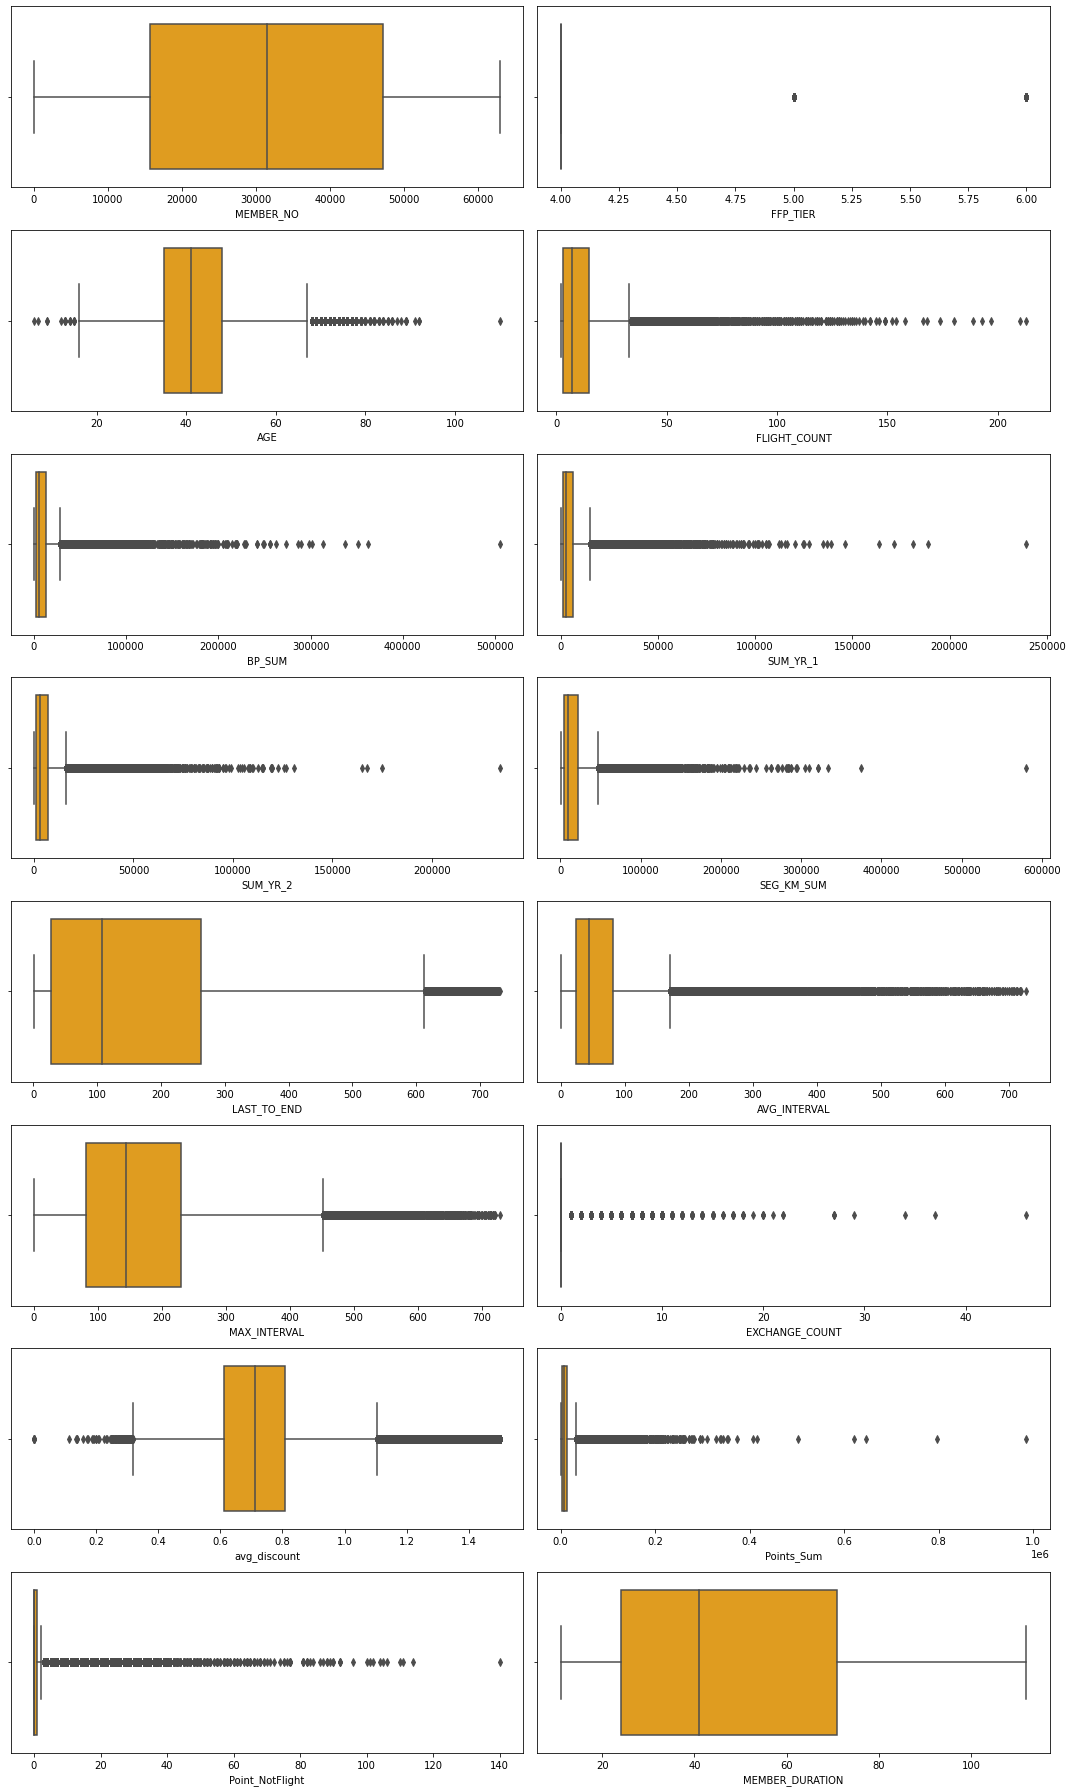

In [ ]:
# boxplot visualization for numerical data

plt.figure(figsize=(15, 25))
for i in range(0, len(numeric)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df_clean[numeric[i]], color='orange')
    plt.tight_layout()

plt.show()


From the box plot observations:

The majority of the columns have outliers, except for the MEMBER_NO, FFP_TIER and MEMBER_DURATION columns

Dist Plot

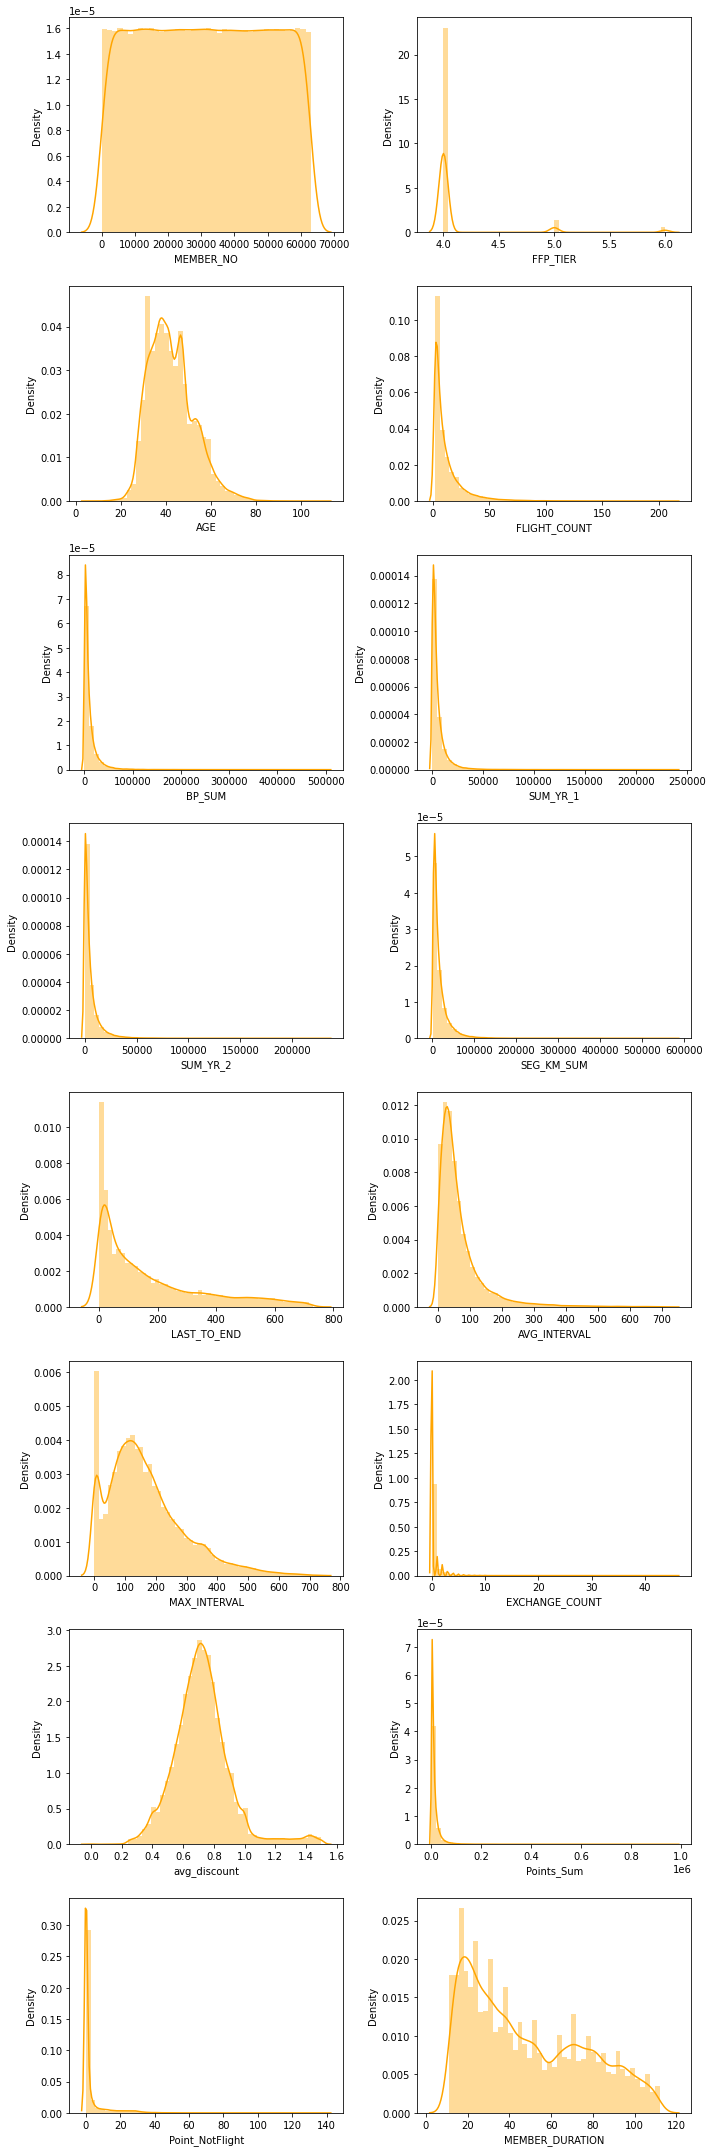

In [ ]:
# distribution plot for numerical data

plt.figure(figsize=(10, 30))
for i in range(0, len(numeric)):
    plt.subplot(8, 2,i+1)
    sns.distplot(df_clean[numeric[i]], color='orange')
    plt.tight_layout()

From the observations of the Dist Plot:

he majority of columns appear to have a positive skewed distribution, except for the MEMBER_NO, FFP_TIER and avg_discount columns

Count Plot

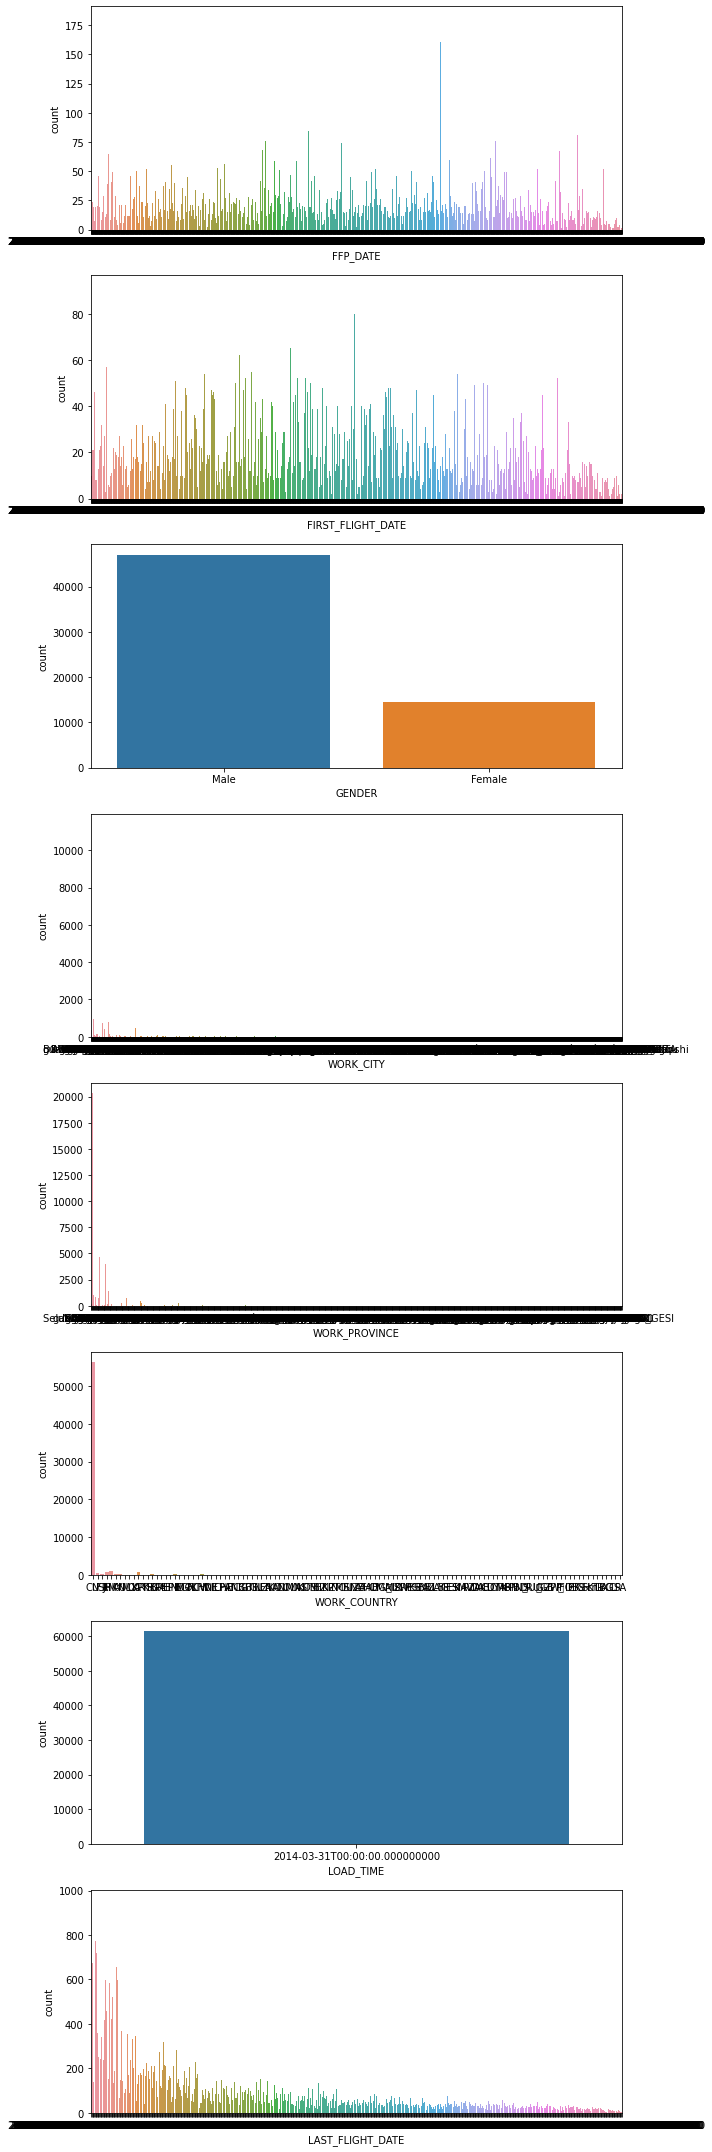

In [ ]:
plt.figure(figsize=(10, 30))
for i in range(0, len(categorical)):
    plt.subplot(8, 1, i+1)
    sns.countplot(df_clean[categorical[i]])
    plt.tight_layout()

From Count Plot's observations:

1. Most members are Male
2. Majority of the columns have a large number of unique values
3. For column LOAD_TIME has 1 value, that is 2014-03-31

##Multivariate Analysis

Correlaction/Associations Heat Map

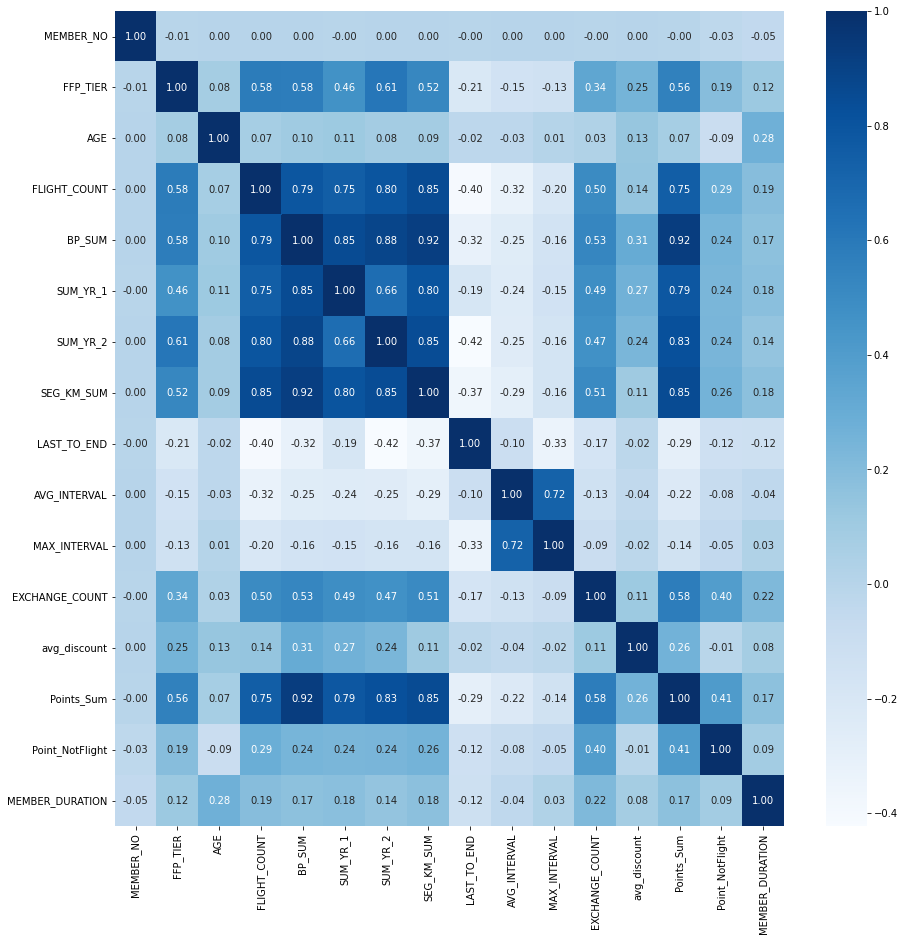

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_clean.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Pair Plot

<Figure size 1080x1080 with 0 Axes>

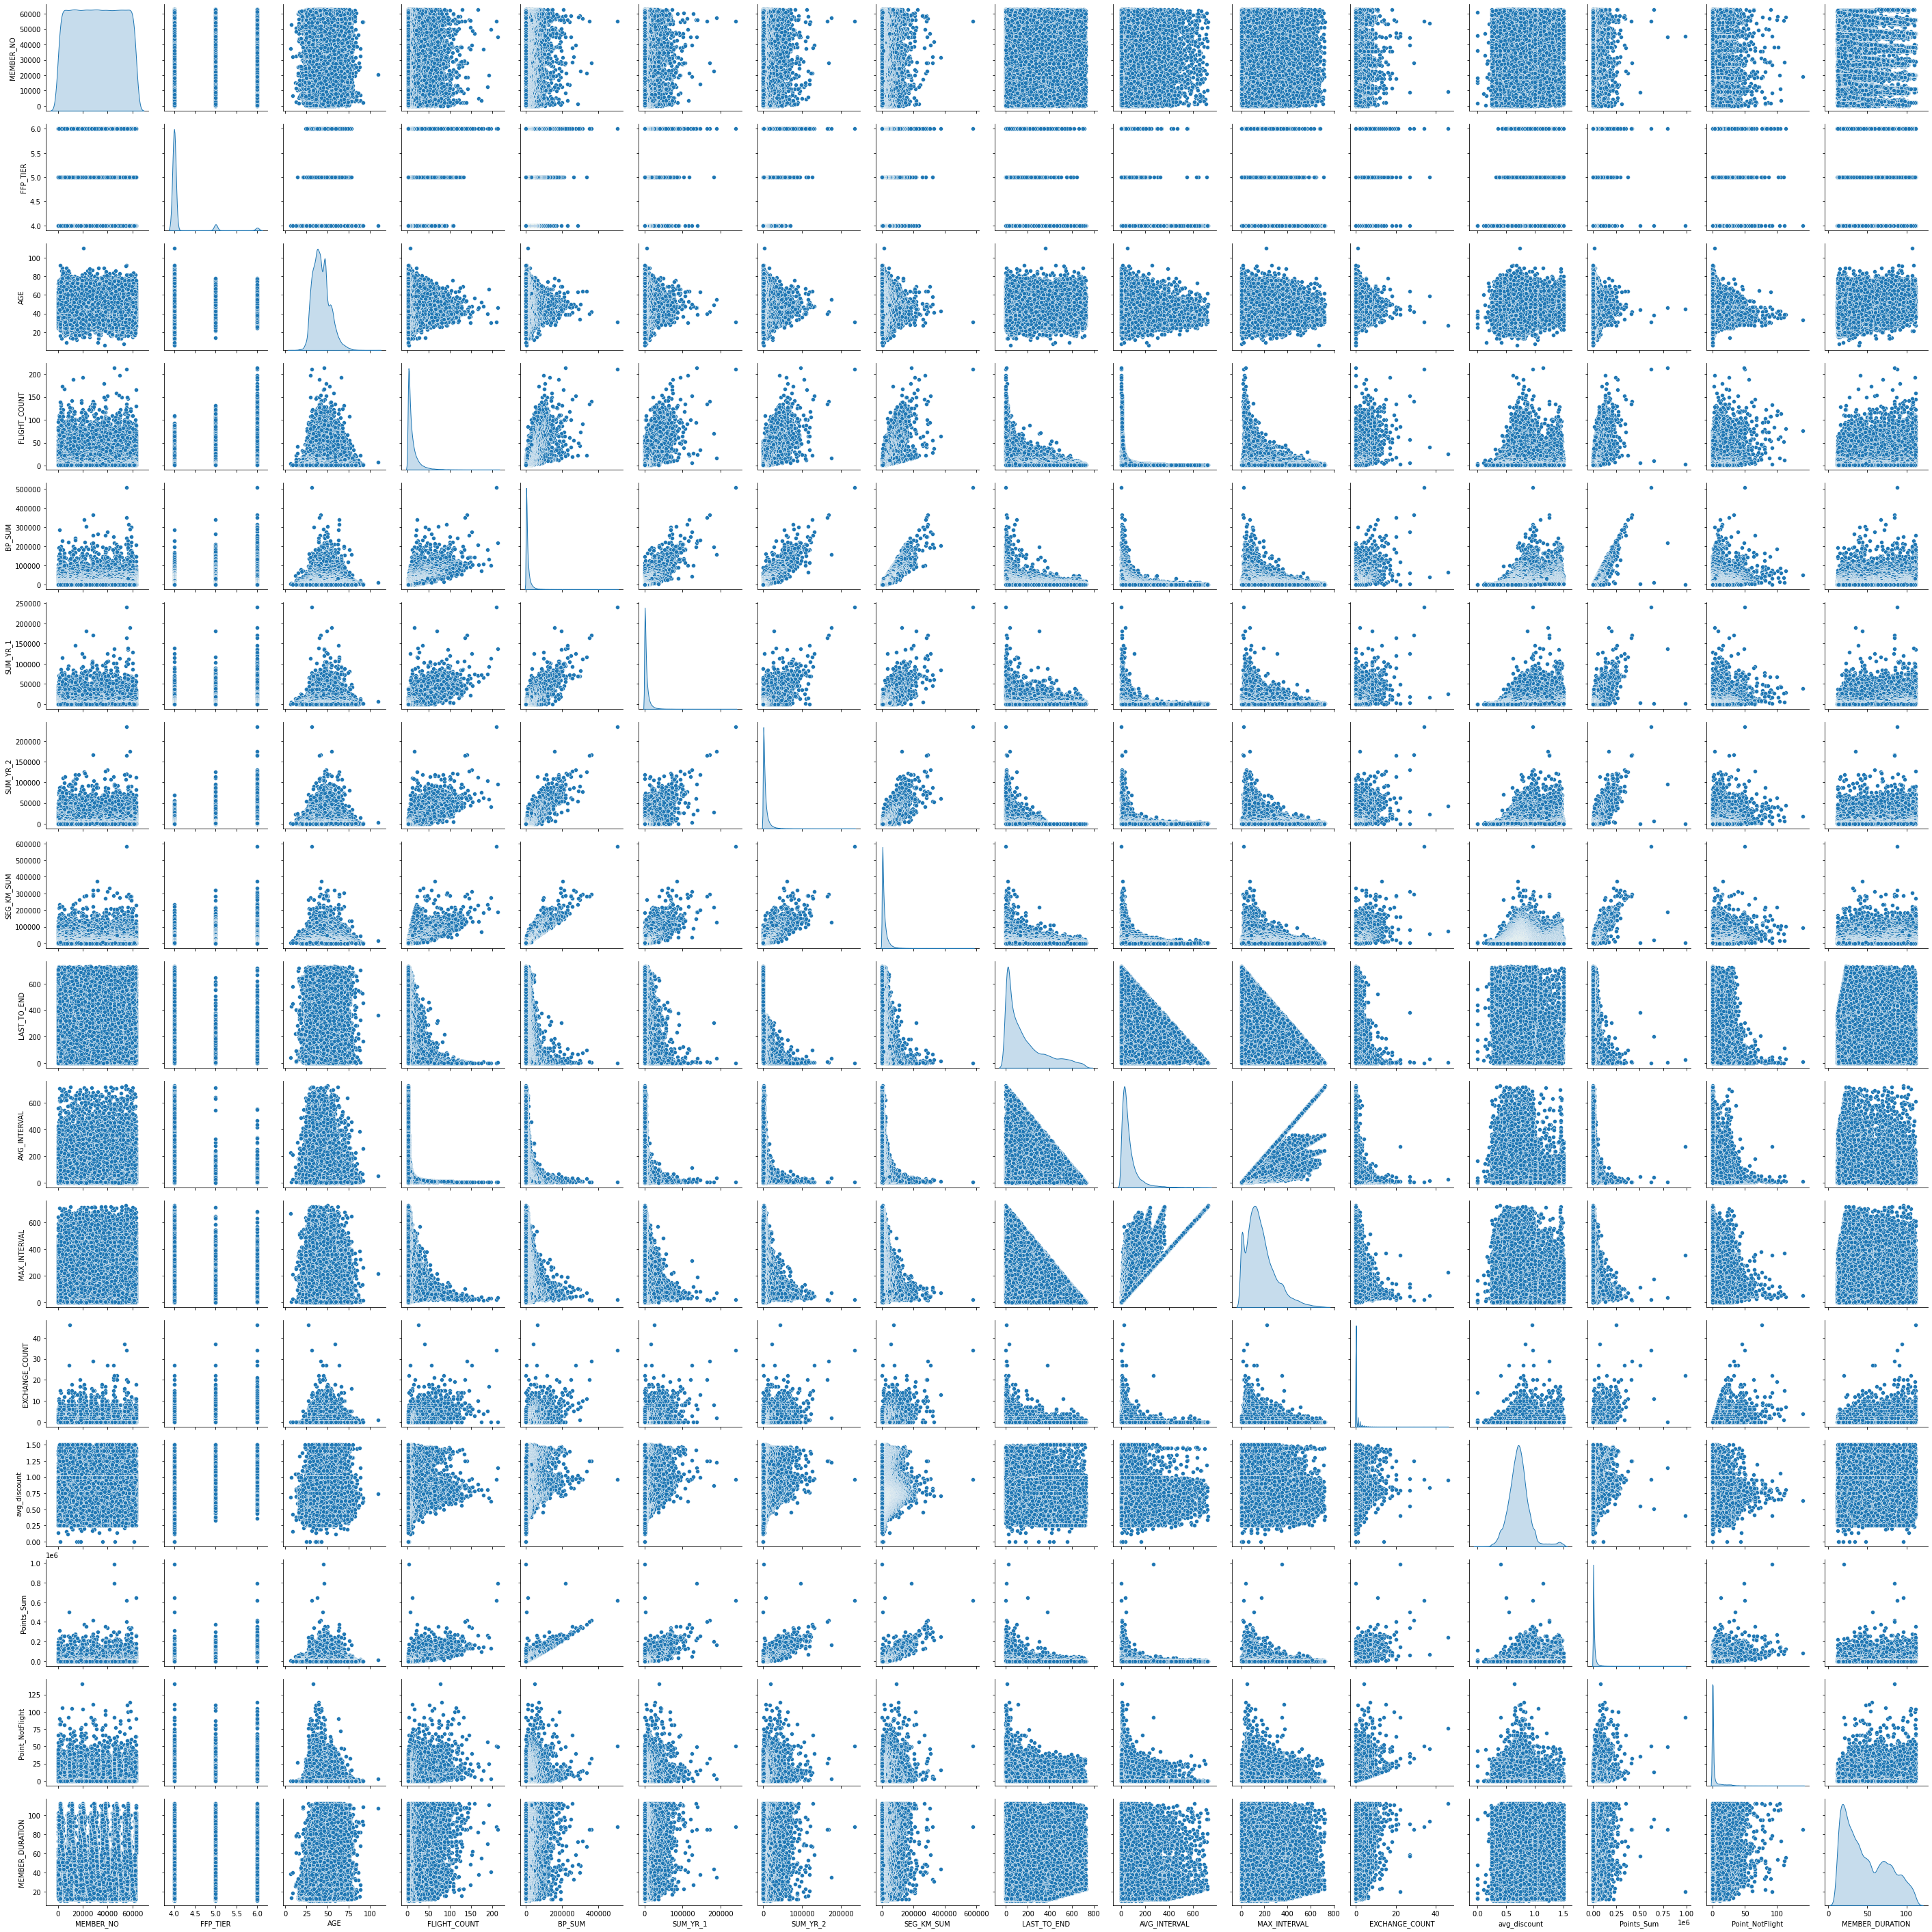

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_clean, diag_kind='kde')
plt.show()

In pairplot, it can be seen that there is a linear correlation between several columns

##EDA Conclusion

##Data Pre-Processing Part 2

Outliers

From the EDA process, it can be seen that there are customers who are 110 years old. Can be considered as an anomaly, therefore the data is deleted

In [ ]:
df_clean[df_clean.AGE > 100]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
23268      20264 2005-04-14        2005-05-18  Female         4  shenzhenshi   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  SEG_KM_SUM  \
23268     guangdong           CN  110 2014-03-31  ...       14053   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  \
23268        2013-04-06          361     50.333333           214   

      EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  \
23268              1      0.740881       11194                3   

       MEMBER_DURATION  
23268              107  

[1 rows x 24 columns]

In [ ]:
df_clean.drop(df_clean[df_clean.AGE > 100].index, inplace = True)

From the results of previous observations, it appears that there is a ticket price column with a value of 0. Then checks are also made on the total distance of flights that have been carried out and the average discount obtained.

Here we can see that there are flight data with ticket prices 0, the average discount is 0, but the total flight distance is more than 0. It can be considered as an anomaly, and because the number is small (7 rows), we can drop these rows.

In [ ]:
df_clean[(df_clean.SUM_YR_1 == 0) & (df_clean.SUM_YR_2 == 0) & (df_clean.avg_discount == 0) & (df_clean.SEG_KM_SUM > 0)]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
62980       1761 2012-08-07        2012-09-09  Female         4   shenzhen   
62981      15206 2011-12-02        2011-12-02  Female         4  guangzhou   
62982      16415 2013-01-20        2013-01-20  Female         4    beijing   
62983      18375 2011-05-20        2013-06-05  Female         4  guangzhou   
62984      36041 2010-03-08        2013-09-14    Male         4     foshan   
62985      45690 2006-03-30        2006-12-02  Female         4  guangzhou   
62986      61027 2013-02-06        2013-02-14  Female         4  guangzhou   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  SEG_KM_SUM  \
62980     guangdong           CN   29 2014-03-31  ...        6138   
62981     guangdong           CN   42 2014-03-31  ...        2158   
62982             .           CN   35 2014-03-31  ...        3848   
62983     guangdong           CN   25 2014-03-31  ...        1134   
62984     guangdong           CN   38 2014-03-31  ...        8016   
62985     guangdong           CN   43 2014-03-31  ...        2594   
62986     guangdong           CN   36 2014-03-31  ...        3934   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  \
62980        2012-09-21          558          12.0            12   
62981        2013-10-06          178           3.0             3   
62982        2013-01-20          437           0.0             0   
62983        2013-06-09          297           4.0             4   
62984        2014-01-03           89          37.0            60   
62985        2014-03-03           29         166.0           166   
62986        2013-02-26          400          12.0            12   

      EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  \
62980              0           0.0           0                0   
62981              0           0.0           0                0   
62982              0           0.0           0                0   
62983              1           0.0       12318               22   
62984             14           0.0      106972               43   
62985              0           0.0           0                0   
62986              0           0.0           0                0   

       MEMBER_DURATION  
62980               19  
62981               27  
62982               14  
62983               34  
62984               48  
62985               96  
62986               13  

[7 rows x 24 columns]

In [ ]:
df_clean.drop(df_clean[(df_clean.SUM_YR_1 == 0) & (df_clean.SUM_YR_2 == 0) & (df_clean.avg_discount == 0) & (df_clean.SEG_KM_SUM > 0)].index, inplace = True)

In [ ]:
print('Total Row', df_clean.shape[0], ', Total Feature', df_clean.shape[1],'\n')

Total Row 61429 , Total Feature 24 



##Feature selection

Using the RFM concept as shown above in performing feature selection:

1. Recency -> column LAST_TO_END
    Distance from last flight time to last flight order
2. Frequency -> column FLIGHT_COUNT
    Number of customer flights
3. Monetary -> column SEG_KM_SUM
    For the monetary column, as an adjustment in the airline business, this feature is replaced by accumulated flight hours within a certain period of time

Then there are also columns that are considered important in assessing customer value in the aviation business, namely:

1. Loyalty -> column MEMBER_DURATION
    Membership length, which reflects whether the member is an existing customer
2. Cabin -> column avg_discount
    Discount factor related to cabin class, reflecting high and low customer value
These columns will be used in the clustering process

In [ ]:
df_select = df_clean.copy()

In [ ]:
df_select = df_select[['MEMBER_DURATION','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df_select.sample(5)

MEMBER_DURATION  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
28391               90          164             4       11606      0.695247
32669               17          271             7        9886      0.668197
47428               27           70             2        4196      0.760000
52906               21           62             2        3330      0.697378
15061               27           88            15       30930      0.513640

##Normalization/Standardization

In [ ]:
# Before scaling
df_select.describe().apply(lambda x: x.apply('{0:.5f}'.format))

MEMBER_DURATION  LAST_TO_END FLIGHT_COUNT    SEG_KM_SUM avg_discount
count     61429.00000  61429.00000  61429.00000   61429.00000  61429.00000
mean         48.21576    173.55024     11.94096   17277.61092      0.72173
std          27.81895    181.47395     14.11951   21055.46042      0.18470
min          11.00000      1.00000      2.00000     368.00000      0.11204
25%          24.00000     28.00000      3.00000    4850.00000      0.61257
50%          41.00000    107.00000      7.00000   10150.00000      0.71181
75%          71.00000    262.00000     15.00000   21433.00000      0.80900
max         112.00000    731.00000    213.00000  580717.00000      1.50000

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_col = ['MEMBER_DURATION', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']

for col in norm_col:
  df_select[col + '_NORM'] = MinMaxScaler().fit_transform(df_select[col].values.reshape(len(df_select), 1))

# Standardization
df_select['avg_discount_STD'] = StandardScaler().fit_transform(df_select['avg_discount'].values.reshape(len(df_select), 1))

In [ ]:
# After scaling
df_select.describe().apply(lambda x: x.apply('{0:.5f}'.format))

MEMBER_DURATION  LAST_TO_END FLIGHT_COUNT    SEG_KM_SUM avg_discount  \
count     61429.00000  61429.00000  61429.00000   61429.00000  61429.00000   
mean         48.21576    173.55024     11.94096   17277.61092      0.72173   
std          27.81895    181.47395     14.11951   21055.46042      0.18470   
min          11.00000      1.00000      2.00000     368.00000      0.11204   
25%          24.00000     28.00000      3.00000    4850.00000      0.61257   
50%          41.00000    107.00000      7.00000   10150.00000      0.71181   
75%          71.00000    262.00000     15.00000   21433.00000      0.80900   
max         112.00000    731.00000    213.00000  580717.00000      1.50000   

      MEMBER_DURATION_NORM LAST_TO_END_NORM FLIGHT_COUNT_NORM SEG_KM_SUM_NORM  \
count          61429.00000      61429.00000       61429.00000     61429.00000   
mean               0.36847          0.23637           0.04711         0.02914   
std                0.27544          0.24859           0.06692         0.03628   
min                0.00000          0.00000           0.00000         0.00000   
25%                0.12871          0.03699           0.00474         0.00772   
50%                0.29703          0.14521           0.02370         0.01686   
75%                0.59406          0.35753           0.06161         0.03630   
max                1.00000          1.00000           1.00000         1.00000   

      avg_discount_STD  
count      61429.00000  
mean          -0.00000  
std            1.00001  
min           -3.30102  
25%           -0.59101  
50%           -0.05371  
75%            0.47251  
max            4.21383

Initialize df_select_std

In [ ]:
df_select_std = df_select.copy()
df_select_std = df_select_std[['MEMBER_DURATION_NORM', 'LAST_TO_END_NORM', 'FLIGHT_COUNT_NORM', 'SEG_KM_SUM_NORM', 'avg_discount_STD']]

In [ ]:
df_select_std.sample(5)

MEMBER_DURATION_NORM  LAST_TO_END_NORM  FLIGHT_COUNT_NORM  \
59897              0.227723          0.860274           0.000000   
62226              0.594059          0.982192           0.000000   
1054               0.663366          0.053425           0.236967   
55274              0.029703          0.480822           0.000000   
28027              0.178218          0.115068           0.028436   

       SEG_KM_SUM_NORM  avg_discount_STD  
59897         0.001744          1.100591  
62226         0.001988         -1.065140  
1054          0.171095         -0.150698  
55274         0.003546          0.476135  
28027         0.023927         -0.793220

#Clustering (K-Means)

Finding the ideal number of clusters using the Inertia and Silhouette Score methods

Inertia

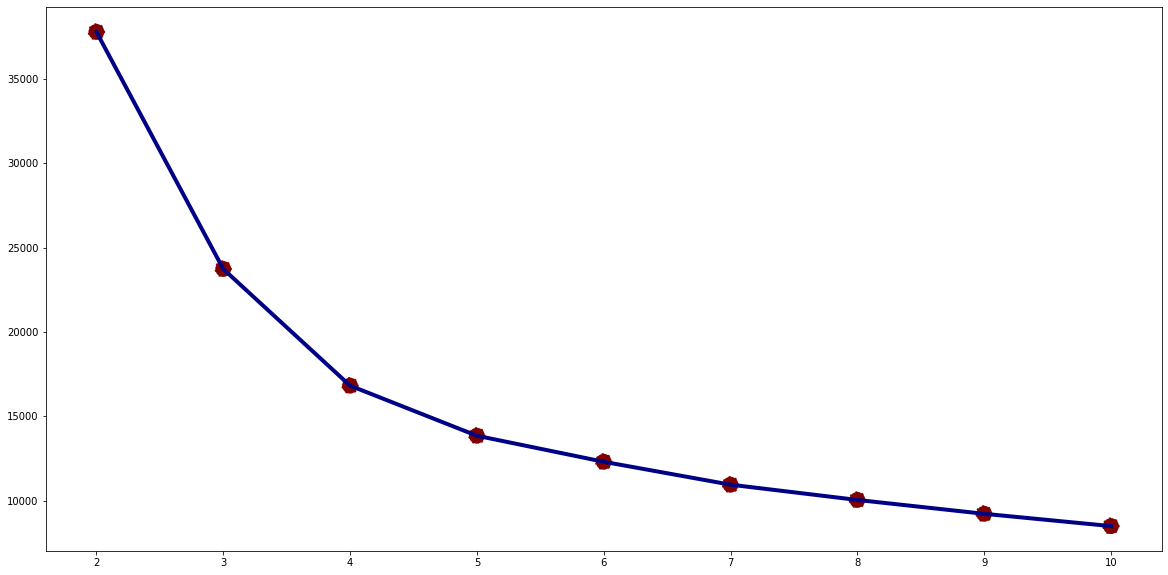

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_select_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_select_std)
    preds = kmeans.predict(df_select_std)
     
    score_euclidean = silhouette_score(df_select_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

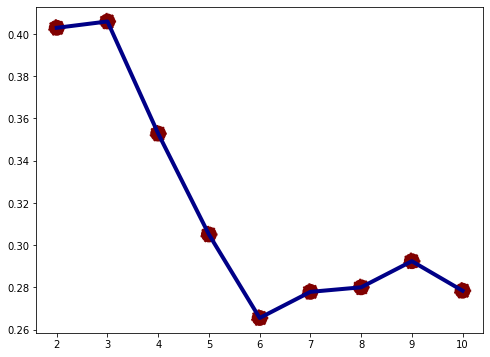

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

Seen from the evaluation using Inertia or Silhouette Score, information obtained the ideal number of clusters is 3 clusters.

#Create Clusters Kmeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_select_std)

In [ ]:
clusters = kmeans.labels_

In [ ]:
df_clean['clusters'] = clusters

In [ ]:
df_clean.sample(5)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER     WORK_CITY  \
4222       54760 2006-05-23        2006-06-26  Female         5  guangzhoushi   
29783      43899 2010-10-16        2010-11-01  Female         4      shenyang   
34259      11371 2005-11-27        2005-12-14    Male         4      shanghai   
7556       20452 2005-11-05        2008-09-02  Female         4       nanjing   
50158      19143 2006-11-26        2014-03-07  Female         4      shenzhen   

       WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  LAST_FLIGHT_DATE  \
4222       guangdong           CN   37 2014-03-31  ...        2014-03-28   
29783  liaoningsheng           CN   31 2014-03-31  ...        2013-10-31   
34259       shanghai           CN   53 2014-03-31  ...        2014-03-23   
7556         jiangsu           CN   49 2014-03-31  ...        2014-03-27   
50158      guangdong           CN   43 2014-03-31  ...        2014-03-20   

       LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT avg_discount  \
4222             4     13.226415            60               2     0.667473   
29783          153     93.333333           181               0     0.453117   
34259            9    114.000000           339               0     0.612449   
7556             5     30.083333            80               2     0.817757   
50158           12      6.500000            11               0     0.533714   

       Points_Sum  Point_NotFlight  MEMBER_DURATION  clusters  
4222        45993                3               94         0  
29783        4286                0               41         0  
34259        5115                0              100         0  
7556        29148                5              100         1  
50158        1754                0               88         0  

[5 rows x 25 columns]

#Clusters Analysis

Dimensionality Reduction for Visualization

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(df_select_std)
pcs = pca.transform(df_select_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

PC 1      PC 2
0  1.322036  0.536434
1  2.889383  0.421894
2  2.901836  0.416626
3  2.005285  0.185232
4  1.359489  0.235990

In [ ]:
df_pca['clusters'] = clusters
df_pca.head(2)

PC 1      PC 2  clusters
0  1.322036  0.536434         1
1  2.889383  0.421894         2

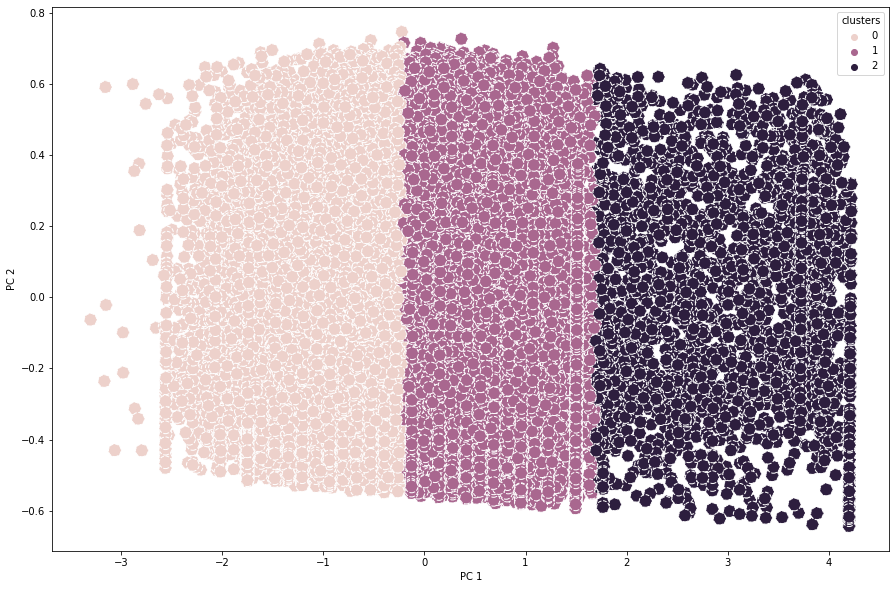

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

plt.show()

#Analysis

In [ ]:
df_clean[['MEMBER_DURATION', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount', 'clusters']].groupby('clusters').median()

MEMBER_DURATION  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
clusters                                                                      
0                    39.0        115.0           6.0      9133.0      0.590000
1                    43.0        102.0           8.0     10876.5      0.781153
2                    53.0         78.0           9.0     12891.5      1.274090

In [ ]:
df_clean['clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "clusters": "total_members"})

clusters  total_members
0         1          33380
1         0          25469
2         2           2580

##insight

Cluster 0 (middle value customer):
1. Mid-level flight recency
2. Mid-level flight frequency
3. Mid-level airline mileage
4. The middle level of average discount, shows the middle level of flight class
4. Membership duration between cluster 1 and cluster 2
5. Highest number of cluster members
6. As a potential customer, airline can encourage these customers to increase transactions

Cluster 1 (low value customer):
1. Highest level flight recency (longest)
2. Lowest rate flight frequency
3. Lowest level of airline mileage
4. In the average discount level, it shows the lower level flight class
5. Most recent membership duration
6. Middle number of cluster members
7. Airline needs to increase interaction with these customers and needs to take certain marketing strategies to extend this customer cycle

Cluster 2 (high value customers):
1. Lowest level flight recency (most recent)
2. Highest level of flight frequency
3. Highest level of airline mileage
4. The highest level of average discount, shows the highest level of flight class
5. Longest membership duration
6. Lowest number of cluster members
7. They are the most ideal type of customer, they contribute the most to the airline. They are also loyal. Airline needs to provide special management for these customers and improve their satisfaction